<a href="https://colab.research.google.com/github/Junrulin0225/Medical-Text-Cancer-Type-Classification/blob/main/Medical_Text_Cancer_Type_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
df = pd.read_csv('Medical Text Dataset.csv',encoding='latin1', quoting=csv.QUOTE_NONE)  #There is single quote mark
df.head()

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""""""" The adopted strategy was the same as that ..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3930 entries, 0 to 3929
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3930 non-null   object
 1   0           3913 non-null   object
 2   a           3913 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


In [4]:
df.columns

Index(['Unnamed: 0', '0', 'a'], dtype='object')

In [5]:
df.columns=['id','cancer_type','text']
df.head()

,id,cancer_type,text
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""""""" The adopted strategy was the same as that ..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [6]:
df.drop(columns='id', axis=1, inplace=True)

In [7]:
df.cancer_type.value_counts()

Thyroid_Cancer    1405
Colon_Cancer      1290
Lung_Cancer       1218
Name: cancer_type, dtype: int64

<Axes: xlabel='cancer_type', ylabel='count'>

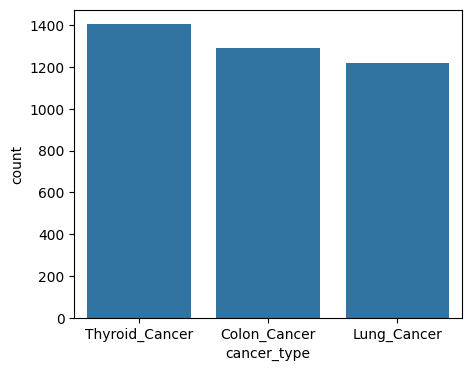

In [8]:
plt.figure(figsize = (5,4))
sns.countplot(x= df.cancer_type)

In [9]:
df.isnull().sum()

cancer_type    17
text           17
dtype: int64

In [10]:
df.shape

(3930, 2)

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(3913, 2)

In [13]:
# Convert cancer type into numeric form with conditions (similar to lambda function)
def condition(x):
    if x=='Thyroid_Cancer':
        return 0
    elif x=='Colon_Cancer':
        return 1
    else:
        return 2

# Applying the conditions
df.cancer_type = df.cancer_type.apply(condition)

In [14]:
df.cancer_type.value_counts()

0    1405
1    1290
2    1218
Name: cancer_type, dtype: int64

**Text preprocessing using NLTK**

Steps :

1. Converting into lower case

2. Tokenizing : spliting sentences into words

3. Removing special characters

4. Removing stopwords and punctuations

5. Stemming: converting into root words

6. Join to make sentences

In [15]:
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.svm import SVC

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
def clean_text(text):
  # convert all the characters to lower case
  text = text.lower()
  # remove unwanted space,... (non english characters)
  text = re.sub(r'[^a-zA-Z+]',' ', text)
  # remove special characters (e.g. !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~)
  text = ''.join([i for i in text if i not in string.punctuation])
  # before removing stopwords, tokenize the text into words
  word_list = word_tokenize(text)
  # stop word list
  stop_word_list = stopwords.words('english')
  #print out the whole text without stopwords
  text = ' '.join([i for i in word_list if i not in stop_word_list])
  return text
df.text = df.text.apply(clean_text)
df.head().to_csv('Text_after_cleaning.csv')
print('file created!')

file created!


In [17]:
from nltk import sent_tokenize
df['character_count']=df['text'].str.len()
df['word_count']=df['text'].apply(lambda x:len(word_tokenize(x)))
df['sentence_count']=df['text'].apply(lambda x:len(sent_tokenize(x)))
df.head()

,cancer_type,text,character_count,word_count,sentence_count
0,0,thyroid surgery children single institution os...,16357,2026,1
1,0,adopted strategy used prior years based four e...,13443,1681,1
2,0,coronary arterybypass grafting thrombosis brin...,17765,2173,1
3,0,solitary plasmacytoma sp skull uncommon clinic...,11421,1303,1
4,0,study aimed investigate serum matrix metallopr...,19572,2171,1


Visualizing words that occur the most. (The size of words reflects its frequency)

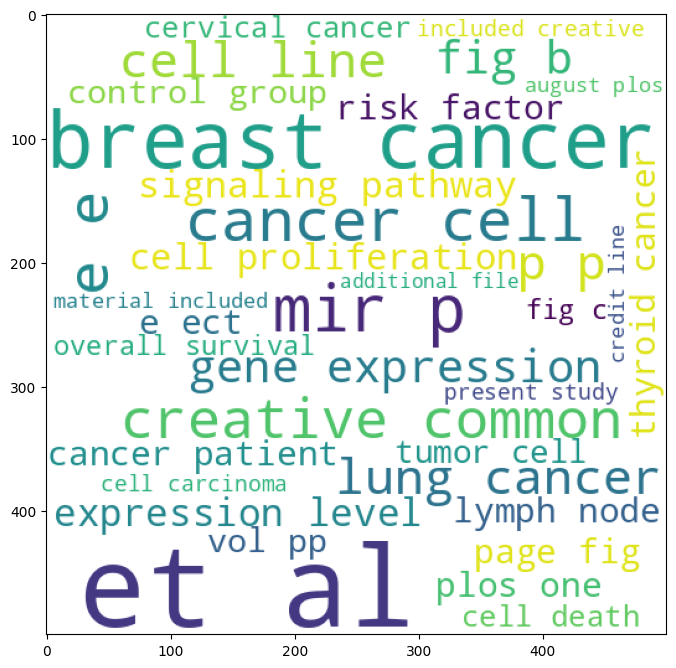

In [18]:
plt.figure(figsize=(8,10))
wc=WordCloud(height=500,width=500,min_font_size=10,background_color='white')
w_c=wc.generate(df[df['cancer_type']==0]['text'].str.cat(sep=" "))
plt.imshow(w_c)

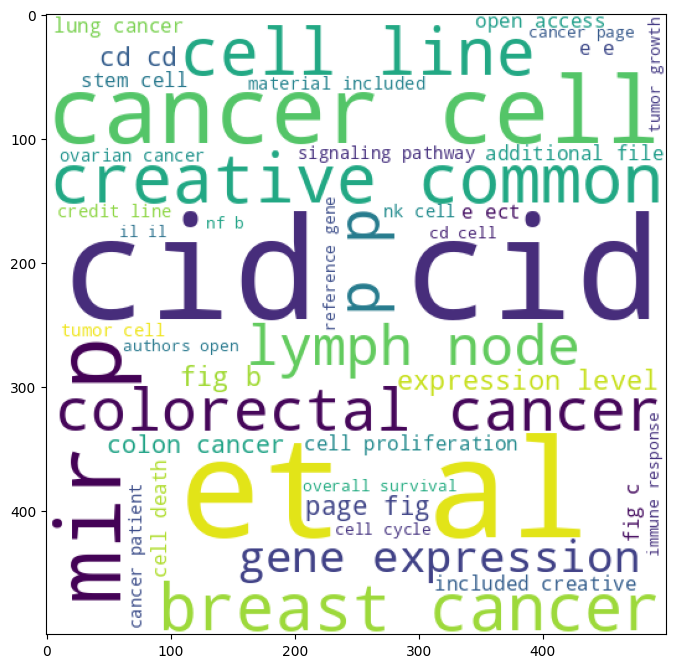

In [19]:
plt.figure(figsize=(8,10))
wc=WordCloud(height=500,width=500,min_font_size=10,background_color='white')
w_c=wc.generate(df[df['cancer_type']==1]['text'].str.cat(sep=" "))
plt.imshow(w_c)

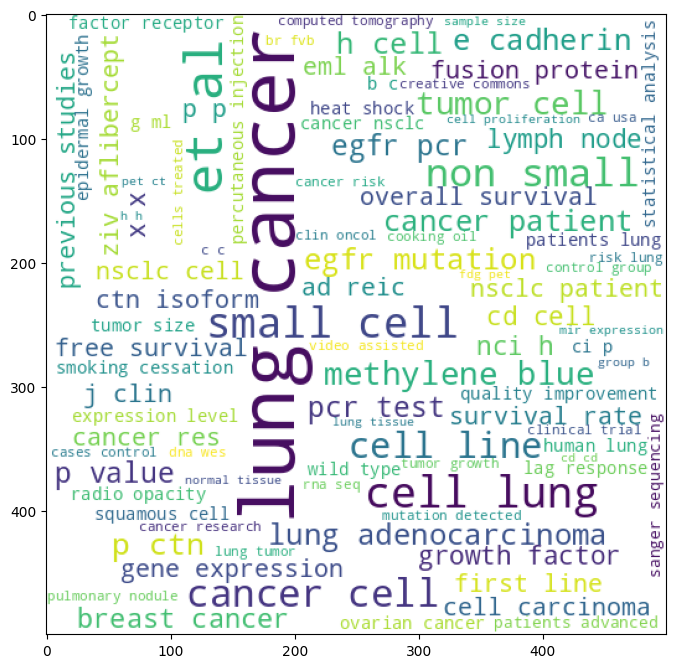

In [20]:
plt.figure(figsize=(8,10))
wc=WordCloud(height=500,width=500,min_font_size=10,background_color='white')
w_c=wc.generate(df[df['cancer_type']==2]['text'].str.cat(sep=" "))
plt.imshow(w_c)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [22]:
vectorize =  TfidfVectorizer(stop_words="english", max_df=0.7)

In [23]:
x= df.text
y= df.cancer_type
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.25, random_state= 53 )

tfidf_train= vectorize.fit_transform(x_train)
tfidf_test= vectorize.transform(x_test)

In [28]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb = nb_classifier.fit(tfidf_train, y_train)
print('score of NB model: ' , nb.score(tfidf_train, y_train))

score of NB model:  0.9263803680981595


In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test, nb.predict(tfidf_test)))
print(f'accuracy score is {accuracy_score(y_test, nb.predict(tfidf_test)).round(2)}')

              precision    recall  f1-score   support

           0       0.69      0.89      0.78      1055
           1       0.87      0.53      0.66       990
           2       0.92      0.99      0.95       890

    accuracy                           0.80      2935
   macro avg       0.82      0.80      0.80      2935
weighted avg       0.82      0.80      0.79      2935

accuracy score is 0.8


In [31]:
accuracy_nb = accuracy_score(y_test, nb.predict(tfidf_test)).round(2)
dic = {'model': 'NB', 'score': [accuracy_nb ]}
df = pd.DataFrame(data=dic)
df.set_index('model', inplace=True)
df

,score
model,
NB,0.8


<Axes: title={'center': 'Accuracy Across Models'}, xlabel='accurarcy score', ylabel='model'>

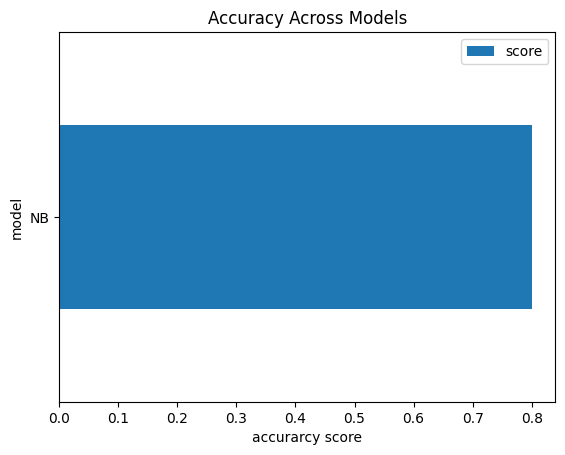

In [32]:
df.plot(kind = 'barh', title= 'Accuracy Across Models', xlabel = 'accurarcy score')